In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.gridspec as grid_spec
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.polynomial.polynomial import polyfit

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

In [2]:
demographic = pd.read_csv("../Data_final/demographic_refined.csv")
df = demographic
df

,Unnamed: 0,zipcode,county_name,city,population,population_rank,city_name,aland,median_household_income,average_household_income,...,hhi_200k_or_more,race_and_ethnicity_total,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,family_poverty_pct,unemployment_pct,housing_units,median_value_of_owner_occupied_units
0,0,90242,Los Angeles,Downey,112322,59,Downey,11788002,71233,85792,...,738,42694,9384.0,34.1,0.1440,0.06500,0.07600,0.05700,12713,513900
1,1,90747,Los Angeles,Carson,92079,83,Carson,16629,72803,91209,...,704,33215,4884.0,39.7,0.1885,0.07477,0.08100,0.06430,9331,464175
2,2,91501,Los Angeles,Burbank,103703,71,Burbank; Glendale,10275284,67817,94589,...,965,20511,5170.0,40.5,0.2810,0.14800,0.09705,0.08100,8417,770500
3,3,92115,San Diego,San Diego,1409573,2,San Diego,16845692,51636,73784,...,1130,64343,9896.0,28.3,0.2020,0.12396,0.11400,0.06500,23089,499100
4,4,92543,Riverside,Hemet,84542,100,East Hemet; Hemet,45646461,33319,45497,...,160,38314,2174.0,35.2,0.0570,0.02301,0.23790,0.15000,14367,136600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,969,90042,Los Angeles,Los Angeles,3966936,1,Los Angeles,12036777,64267,87211,...,1641,63193,13600.0,35.8,0.2130,0.11000,0.11300,0.06800,22061,627200
970,970,90043,Los Angeles,Los Angeles,3966936,1,Los Angeles; View Park-Windsor Hills,10705825,54729,77169,...,1236,45873,11096.0,40.1,0.1600,0.10205,0.14210,0.09000,18748,556400
971,971,90044,Los Angeles,Los Angeles,3966936,1,Los Angeles; West Athens; Westmont,13303667,35981,51524,...,474,99443,19360.0,31.6,0.0590,0.02000,0.26200,0.07104,30461,391100
972,972,90045,Los Angeles,Los Angeles,3966936,1,Del Aire; Los Angeles,27794039,104578,140825,...,3432,40567,3780.0,35.1,0.3830,0.22500,0.04602,0.05000,17133,959400


<ipython-input-3-81f14505825a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0', "250,000", "500,000", "750,000", "1,000,000", "1,250,000", "1,500,000", "1,750,000",


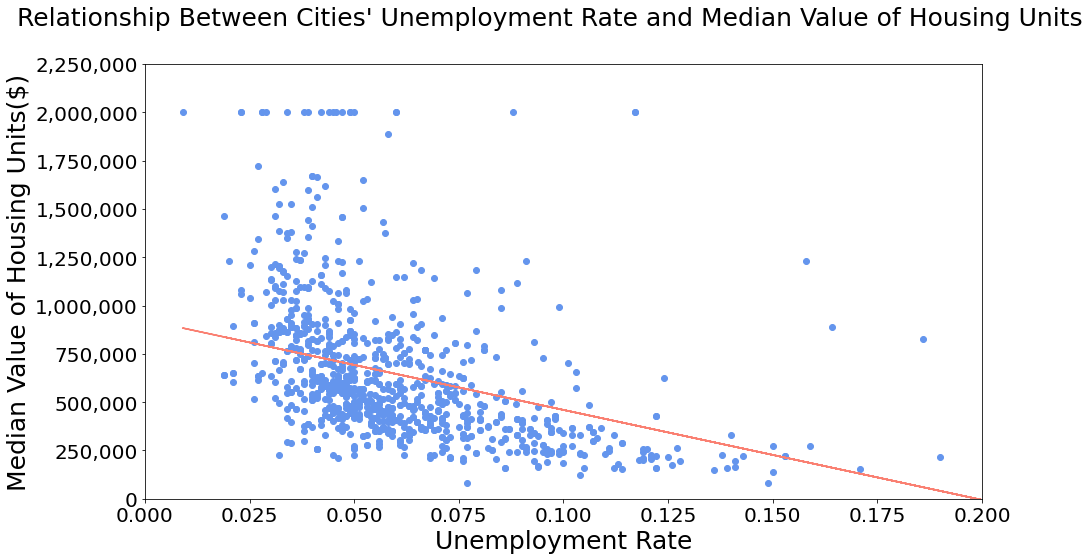

In [3]:
fig, ax = plt.subplots(figsize=(15,8))
ax. ticklabel_format(useOffset=False, style='plain')
##ttl = ax.title
ax.title.set_position([0.5, 50])

b, m = polyfit(demographic['unemployment_pct'], demographic["median_value_of_owner_occupied_units"], 1)
plt.plot(demographic['unemployment_pct'], b + m * demographic['unemployment_pct'], color = "salmon")

plt.scatter(demographic['unemployment_pct'], demographic["median_value_of_owner_occupied_units"], color = "cornflowerblue")

##plt.title("Relationship Between Cities' Unemployment Rate and Median Value of Housing Units", fontsize = 20)
fig.suptitle("Relationship Between Cities' Unemployment Rate and Median Value of Housing Units", fontsize=25)
plt.xlabel("Unemployment Rate", fontsize = 25)
plt.ylabel("Median Value of Housing Units($)", fontsize = 25)
plt.xlim(0, 0.2)
plt.ylim(0, 2250000)
plt.xticks(fontsize= 20)
##ax.set_xticklabels(demographic['unemployment_pct'], fontsize = 20)
ax.set_yticklabels(['0', "250,000", "500,000", "750,000", "1,000,000", "1,250,000", "1,500,000", "1,750,000",
                   "2,000,000", "2,250,000"], fontsize = 20)

plt.show()

In [4]:
temp = demographic
temp = temp.drop("zipcode", axis=1)
tc = round(temp.corr(), 2)
tc = tc.drop(columns=['Unnamed: 0','median_household_income', 'average_household_income', 'per_capita_income', 'percent_of_households_with_incomes_200000_or_more',
                  'hhi_lt_25k',   'race_and_ethnicity_total',
                'family_poverty_pct'])
tc

,population,population_rank,aland,householder_under_25_years,householder_65_years_and_over,hhi_200k_or_more,population_density_sq_mi,median_age,educational_attainment_bachelors,educational_attainment_graduate,unemployment_pct,housing_units,median_value_of_owner_occupied_units
Unnamed: 0,-0.29,0.11,0.11,0.08,0.06,0.13,-0.08,-0.00,-0.00,0.04,-0.04,0.05,-0.02
population,1.00,-0.52,-0.17,-0.12,-0.08,-0.01,0.34,-0.01,0.12,0.04,0.07,0.06,0.17
population_rank,-0.52,1.00,0.16,0.05,0.12,0.04,-0.25,0.11,-0.07,-0.01,-0.06,-0.02,-0.04
aland,-0.17,0.16,1.00,-0.05,-0.01,-0.03,-0.35,-0.04,-0.19,-0.15,0.06,0.10,-0.20
median_household_income,-0.10,0.10,-0.04,0.45,0.72,0.68,-0.20,0.45,0.69,0.71,-0.51,-0.16,0.68
average_household_income,-0.02,0.07,-0.07,0.39,0.75,0.65,-0.14,0.45,0.74,0.78,-0.45,-0.19,0.83
per_capita_income,0.08,0.00,-0.11,0.33,0.64,0.61,-0.01,0.57,0.76,0.80,-0.51,-0.14,0.81
percent_of_households_with_incomes_200000_or_more,-0.01,0.05,-0.07,0.42,0.72,0.70,-0.09,0.44,0.75,0.81,-0.46,-0.17,0.81
householder_under_25_years,-0.12,0.05,-0.05,1.00,0.17,0.43,0.03,0.19,0.28,0.24,-0.24,-0.01,0.32
householder_65_years_and_over,-0.08,0.12,-0.01,0.17,1.00,0.41,-0.28,0.35,0.53,0.66,-0.34,-0.21,0.58


[Text(0.5, 0, 'population'),
 Text(1.5, 0, 'population_rank'),
 Text(2.5, 0, 'aland'),
 Text(3.5, 0, 'householder_under_25_years'),
 Text(4.5, 0, 'householder_65_years_and_over'),
 Text(5.5, 0, 'hhi_200k_or_more'),
 Text(6.5, 0, 'population_density_sq_mi'),
 Text(7.5, 0, 'median_age'),
 Text(8.5, 0, 'educational_attainment_bachelors'),
 Text(9.5, 0, 'educational_attainment_graduate'),
 Text(10.5, 0, 'unemployment_pct'),
 Text(11.5, 0, 'housing_units'),
 Text(12.5, 0, 'median_value_of_owner_occupied_units')]

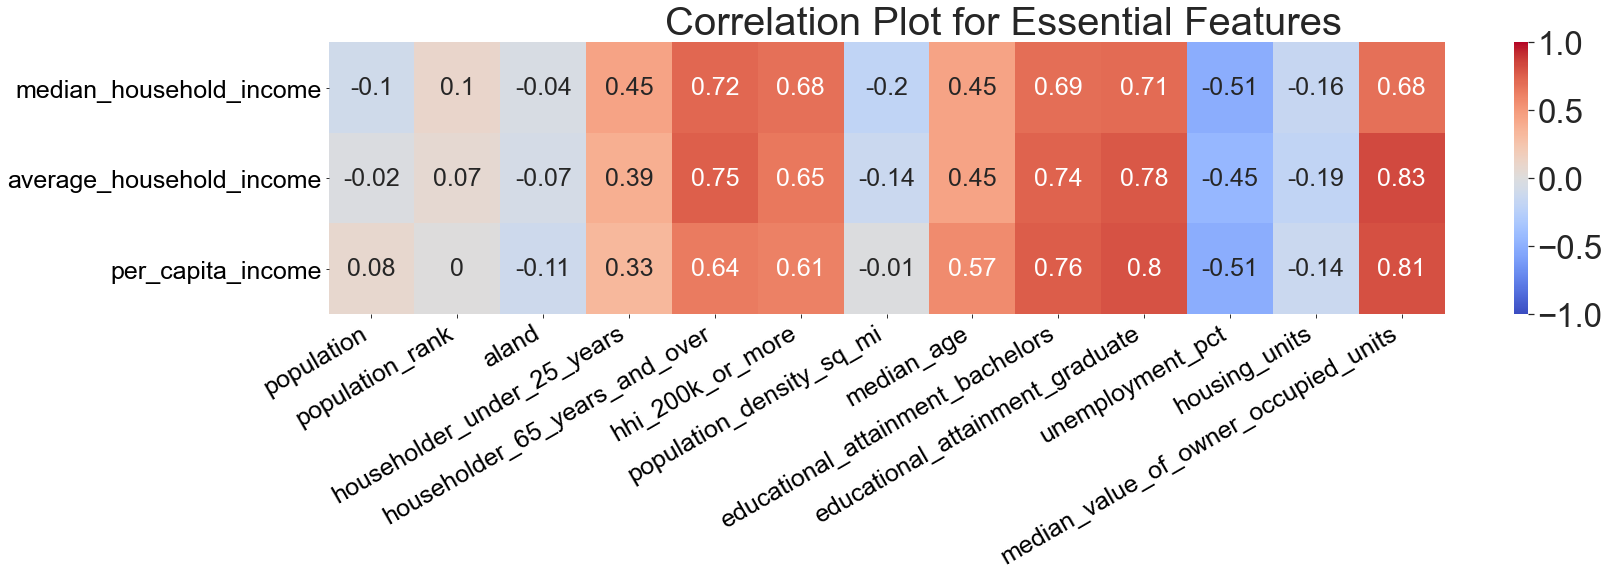

In [5]:
fig, ax = plt.subplots(figsize=(25,5))
sns.set(font_scale=3)
sns.heatmap(tc[4:7], annot = True, 
            cmap=plt.get_cmap('coolwarm'), vmin = -1, vmax = 1, annot_kws={"fontsize":25}).figure.axes[-1].yaxis.label.set_size(450)
fig.suptitle('Correlation Plot for Essential Features', fontsize=40)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 25)
ax.set_xticklabels(ax.get_xticklabels(), rotation="30", horizontalalignment='right', fontsize = 25)

In [6]:
housing = pd.read_csv("../Data_final/zip_housing_cleaned.csv")
housing

,postal_code,year_built,is_multi_family,is_single_family,is_condo,is_new_construction,beds,baths,baths_beds_ratio,garage,price,lot_size,building_size,line,neighborhoods,city,county
0,90001,1906.0,1,0,0,0,3.0,2.0,0.6667,3.0,570000,7057.0,1756.0,6375 Converse Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles
1,90001,1913.0,0,1,0,0,3.0,1.5,0.5000,1.0,470000,5721.0,1030.0,7916 Alix Ave,"['Florence-Graham', 'South LA']",Los Angeles,Los Angeles
2,90001,1938.0,1,0,0,0,3.0,2.0,0.6667,2.0,830000,5495.0,2503.0,1222 E 78th St,['South LA'],Los Angeles,Los Angeles
3,90001,1905.0,0,1,0,0,4.0,2.0,0.5000,2.0,400000,5387.0,1248.0,1659 E 70th St,['South LA'],Los Angeles,Los Angeles
4,90001,1912.0,0,0,1,0,5.0,2.0,0.4000,2.0,659000,5667.0,1897.0,1364 E 58th Pl,['South LA'],Los Angeles,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98073,96003,2006.0,0,1,0,0,3.0,2.5,0.8333,2.0,275000,2614.0,1430.0,2365 LA Villa Way,"['Northeast Redding', 'The Villages at Shasta ...",Redding,Shasta
98074,96003,1989.5,0,0,0,0,3.0,2.0,0.6667,2.0,899000,15682.0,1657.5,13450 Mitchellinda Dr,NaN,Redding,Shasta
98075,96003,1977.0,0,1,0,0,3.0,2.0,0.6667,5.0,483500,89734.0,2552.0,19287 Roxie Ln,NaN,Redding,Shasta
98076,96003,1984.0,0,1,0,0,4.0,3.0,0.7500,4.0,345000,87120.0,2040.0,13143 Tamera Way,NaN,Redding,Shasta


In [7]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=False)
housing_groupby_city

housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10

,city,postal_code,year_built,is_multi_family,is_single_family,is_condo,is_new_construction,beds,baths,baths_beds_ratio,garage,price,lot_size,building_size
85,Palo Alto,94303.0,1956.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,2744000.0,6634.0,1762.0
77,Newport Beach,92661.0,1973.0,0.0,1.0,0.0,0.0,3.0,2.5,0.9000,2.0,2245000.0,3575.0,2240.5
74,Mountain View,94041.0,1979.0,0.0,0.0,0.0,0.0,3.0,2.5,0.8333,2.0,1700000.0,4132.0,1521.0
97,Redwood City,94062.0,1960.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,1650000.0,6500.0,1620.0
115,Santa Barbara,93105.0,1963.0,0.0,1.0,0.0,0.0,3.0,2.0,0.8333,2.0,1567500.0,9583.0,0.0
126,Sunnyvale,94087.0,1973.0,0.0,0.0,0.0,0.0,3.0,2.0,0.6667,2.0,1407500.0,5200.0,1529.0
120,Santa Monica,90403.0,1968.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0000,2.0,1395000.0,7993.0,1460.0
36,Encinitas,92024.0,1985.0,0.0,1.0,0.0,0.0,3.0,2.5,0.7500,2.0,1380500.0,11401.5,1792.0
108,San Francisco,94116.0,1940.0,0.0,0.0,1.0,0.0,3.0,2.0,0.7500,1.0,1380000.0,2996.0,1311.0
112,San Mateo,94402.0,1957.0,0.0,1.0,0.0,0.0,3.0,2.0,0.7500,2.0,1380000.0,6161.0,1440.0


<ipython-input-8-df0a371b342c>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0', "1,000,000", "2,000,000", "3,000,000", "4,000,000", "5,000,000", "6,000,000"], fontsize = 20)


[Text(0.0, 0, '0'),
 Text(1000000.0, 0, '1,000,000'),
 Text(2000000.0, 0, '2,000,000'),
 Text(3000000.0, 0, '3,000,000'),
 Text(4000000.0, 0, '4,000,000'),
 Text(5000000.0, 0, '5,000,000'),
 Text(6000000.0, 0, '6,000,000')]

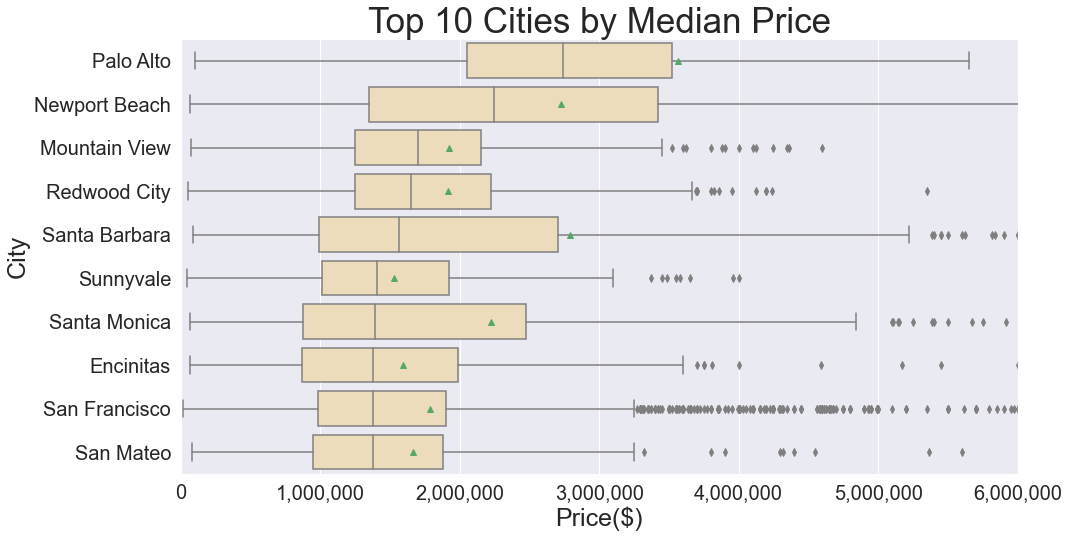

In [8]:
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))
ax1.ticklabel_format(useOffset=False, style='plain')

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "wheat", showmeans = True, 
           order = ['Palo Alto', 'Newport Beach', 'Mountain View', 'Redwood City', 'Santa Barbara', 'Sunnyvale',
                   'Santa Monica', 'Encinitas', 'San Francisco', 'San Mateo'])
plt.title("Top 10 Cities by Median Price", fontsize = 35)
plt.xlabel("Price($)", fontsize = 25)
plt.ylabel("City", fontsize = 25)
plt.xlim(0, 6000000)

plt.yticks(fontsize= 20)
ax1.set_xticklabels(['0', "1,000,000", "2,000,000", "3,000,000", "4,000,000", "5,000,000", "6,000,000"], fontsize = 20)

In [9]:
housing_groupby_city = housing.groupby("city", as_index = False).median()
housing_groupby_city = housing_groupby_city.sort_values(by='price', ascending=True)
housing_groupby_city

,city,postal_code,year_built,is_multi_family,is_single_family,is_condo,is_new_construction,beds,baths,baths_beds_ratio,garage,price,lot_size,building_size
131,Tulare,93274.0,1980.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,267000.0,7983.0,1252.0
5,Bakersfield,93308.0,1984.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,279000.0,7587.0,1508.0
4,Apple Valley,92307.5,1987.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,291500.0,25265.0,1858.0
48,Hemet,92544.0,1980.0,0.0,1.0,0.0,0.0,3.0,2.0,0.7500,2.0,293750.0,7405.0,1456.0
139,Visalia,93291.0,1987.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,295000.0,7405.0,1354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Santa Barbara,93105.0,1963.0,0.0,1.0,0.0,0.0,3.0,2.0,0.8333,2.0,1567500.0,9583.0,0.0
97,Redwood City,94062.0,1960.0,0.0,1.0,0.0,0.0,3.0,2.0,0.6667,2.0,1650000.0,6500.0,1620.0
74,Mountain View,94041.0,1979.0,0.0,0.0,0.0,0.0,3.0,2.5,0.8333,2.0,1700000.0,4132.0,1521.0
77,Newport Beach,92661.0,1973.0,0.0,1.0,0.0,0.0,3.0,2.5,0.9000,2.0,2245000.0,3575.0,2240.5


<ipython-input-10-b3fa9f1abb2f>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0', "1,000,000", "2,000,000", "3,000,000", "4,000,000", "5,000,000", "6,000,000"], fontsize = 20)


[Text(0.0, 0, '0'),
 Text(1000000.0, 0, '1,000,000'),
 Text(2000000.0, 0, '2,000,000'),
 Text(3000000.0, 0, '3,000,000'),
 Text(4000000.0, 0, '4,000,000'),
 Text(5000000.0, 0, '5,000,000'),
 Text(6000000.0, 0, '6,000,000')]

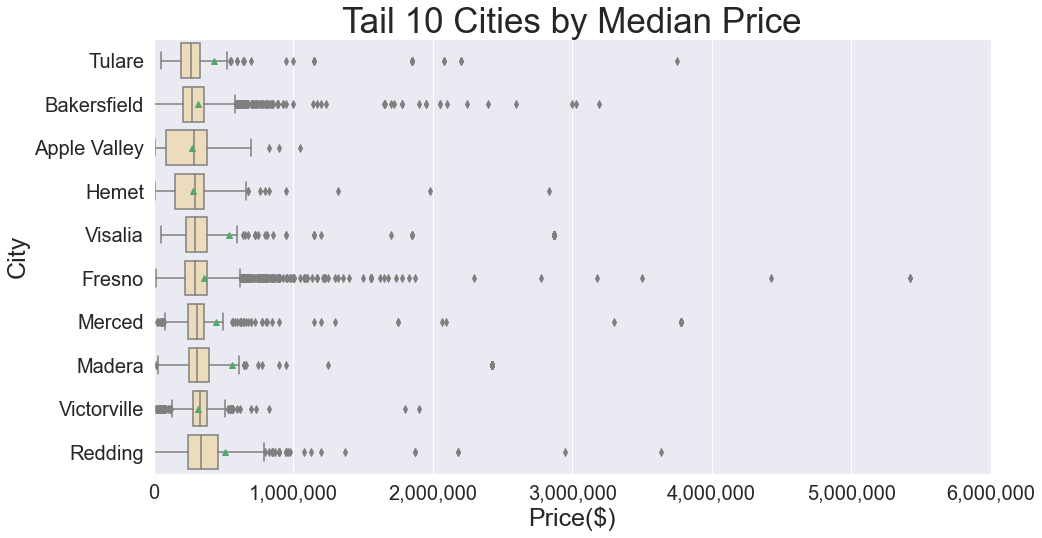

In [10]:
housing_groupby_city_top_10 = housing_groupby_city.head(10)
top_10_list = housing_groupby_city_top_10['city'].tolist()
housing_groupby_city_top_10
grouped_price = housing[["city", "price"]]
grouped_price_top_10 = grouped_price[grouped_price["city"].isin(top_10_list)]
##grouped_price_top_10.boxplot()
##grouped_price_top_10 = grouped_price_top_10.groupby("city", as_index = False)
##grouped_price_top_10.boxplot(subplots = False, rot=45, figsize=(8,10))
##plt.ylim(0, 5000000)
fig , ax1 = plt.subplots(figsize=(15,8))

median_price_boxplot = sns.boxplot(y='city',x='price',data=grouped_price_top_10,orient="h", color = "wheat", showmeans=True, 
           order = top_10_list)
plt.title("Tail 10 Cities by Median Price", fontsize = 35)
plt.xlabel("Price($)", fontsize = 25)
plt.ylabel("City", fontsize = 25)
plt.xlim(0, 6000000)

plt.yticks(fontsize= 20)
ax1.set_xticklabels(['0', "1,000,000", "2,000,000", "3,000,000", "4,000,000", "5,000,000", "6,000,000"], fontsize = 20)

In [11]:
data =housing_groupby_city_top_10

In [12]:
countries = [x for x in np.unique(data['city'])]
colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

ValueError: `dataset` input should have multiple elements.

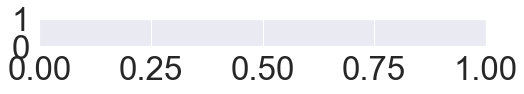

In [13]:
gs = (grid_spec.GridSpec(len(countries),1))

fig = plt.figure(figsize=(8,6))

i = 0

#creating empty list
ax_objs = []

for country in countries:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    plot = (data[data['city'] == country]['price'].plot.kde(ax=ax_objs[-1],color="#f0f0f0", lw=0.5)
           )

    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y

    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i])

    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0, 1)
    ax_objs[-1].set_ylim(0,2.2)

    i += 1

plt.tight_layout()
plt.show()

In [ ]:
##data.to_csv('tail10.csv')

#### 